## Blinkit Data Analysis

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [2]:
df=pd.read_csv('blinkit_data.csv')

### Exploratory data Analysis-EDA

In [3]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


#### Fining the missing values and replacing the null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df['Item Weight'].isnull().sum()

1463

In [5]:
#Inour analysis we not focussed on weights so instead of deleting the rows with nan values we are replacing nan with 0
df['Item Weight'].fillna(0,inplace=True)

In [6]:
df['Item Weight'].isnull().sum()

0

#### Checking for unique values in each of the object column

In [7]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
# Since the "Item Fat Content" has dupliate categories as Low fat ,Low Fat and LF have the same meaning .Similar with the Regular and reg.
df['Item Fat Content'].replace({'reg':'Regular',
                                'low fat':'Low Fat',
                                'LF':'Low Fat'
                               },inplace=True)

In [9]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [10]:
df['Item Type'].unique()

array(['Fruits and Vegetables', 'Health and Hygiene', 'Frozen Foods',
       'Canned', 'Soft Drinks', 'Household', 'Snack Foods', 'Meat',
       'Breads', 'Hard Drinks', 'Others', 'Dairy', 'Breakfast',
       'Baking Goods', 'Seafood', 'Starchy Foods'], dtype=object)

In [11]:
df['Outlet Location Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [12]:
df['Outlet Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [13]:
df['Outlet Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [14]:
### Since all these objects have very limited categories so we are changing the dtype to categoriucal dtype
# df['Item Fat Content']=df['Item Fat Content'].astype('category')
# df['Item Type']=df['Item Type'].astype('category')
# df['Outlet Location Type']=df['Outlet Location Type'].astype('category')
# df['Outlet Size']=df['Outlet Size'].astype('category')
# df['Outlet Type']=df['Outlet Type'].astype('category')

In [15]:
cat_columns=['Item Fat Content','Item Type','Outlet Location Type','Outlet Size','Outlet Type']

In [16]:
def change_to_categorical_data(df):
    for col in cat_columns:
        df[col]=df[col].astype('category')

In [17]:
change_to_categorical_data(df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item Fat Content           8523 non-null   category
 1   Item Identifier            8523 non-null   object  
 2   Item Type                  8523 non-null   category
 3   Outlet Establishment Year  8523 non-null   int64   
 4   Outlet Identifier          8523 non-null   object  
 5   Outlet Location Type       8523 non-null   category
 6   Outlet Size                8523 non-null   category
 7   Outlet Type                8523 non-null   category
 8   Item Visibility            8523 non-null   float64 
 9   Item Weight                8523 non-null   float64 
 10  Sales                      8523 non-null   float64 
 11  Rating                     8523 non-null   float64 
dtypes: category(5), float64(4), int64(1), object(2)
memory usage: 509.1+ KB


#### Checking for duplicates and removal of duplicates

In [19]:
df.duplicated().sum()

0

#### Outliers detection and removal

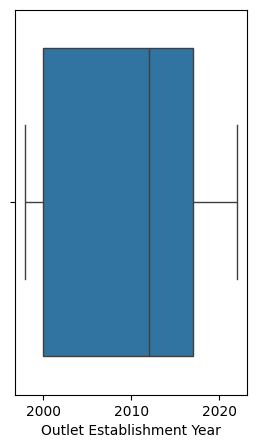

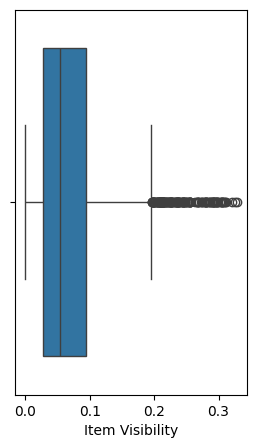

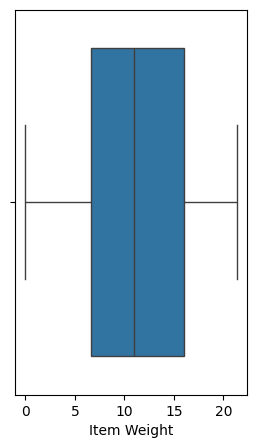

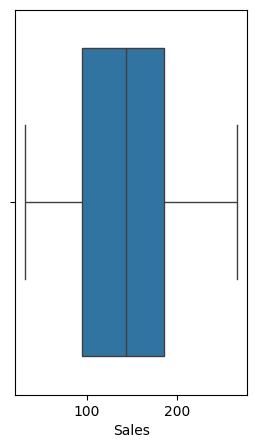

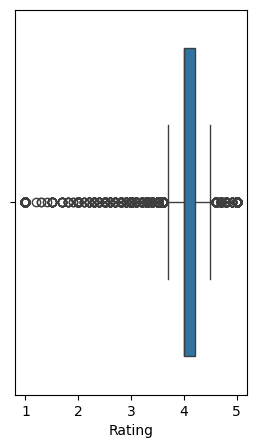

In [40]:
for col in df.columns:
    if (df[col].dtype != 'object') & (df[col].dtype != 'category'):
        plt.figure(figsize=(3,5))
        sns.boxplot(data=df,x=col)
        plt.show()

In [20]:
# # In this analysis we are more focussed on the Sales and we are ignoring the ouliers in the columns 'Ratings' And 'Item Visibility' .
# #If we need to remove outliers we can follow up the below commented code
# outlier_cols=['Item Visibility','Rating']
# def remove_outliers(df,outlier_cols):
#     Q1=np.percentile(df[col],25)
#     Q2=np.percentile(df[col],75)
#     IQR=Q3-Q1
#     lb=Q1-(1.5 * IQR)
#     ub=Q3+(1.5*IQR)
#     df=df[(df[col]>=lb) & (df[col]<=ub) ]
#     return df

#### Encoding of the categorical data

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
## Since we are not going to apply any machine learning algorithm that why we are not Encoding data.
# You can encode the data using the below code

In [23]:
# categorical_columns=['Item Fat Content','Item Type','Outlet Location Type','Outlet Size','Outlet Type']
# mapings_dict={}
# for col in categorical_columns:
#     le=LabelEncoder()
#     df[col]=le.fit_transform(df[col])
#     mappings_dict[col]=dict(zip(le.classes_,le.tranform(le_classes)))

# #Printing the mappings
# for key,value in mappings_dict.items():
#     print(key,value)


### Buisiness Requirement
### KPI'S Requirement

#### Total Sales

In [47]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [48]:
total_sales=df['Sales'].sum()
print(f"Total Sales : {total_sales}")

Total Sales : 1201681.4808


#### Average Sales

In [50]:
avg_sales=df['Sales'].mean()
print(f"Average Sales : {avg_sales}")

Average Sales : 140.9927819781767


#### Number of Items : The total count of different items sold

In [51]:
no_of_items_sold=df['Sales'].count()
print(f"Average Sales : {no_of_items_sold}")

Average Sales : 8523


#### Average Rating

In [71]:
avg_rating=df['Rating'].mean()
print(f"Average Rating : {avg_rating:.1f}")

Average Rating : 4.0


### Charts Requirements

#### Total Sales by Fat Content:
	Objective: Analyze the impact of fat content on total sales.
	Additional KPI Metrics: Assess how other KPIs (Average Sales, Number of Items, Average Rating) vary with fat content.
	Chart Type: Donut Chart.

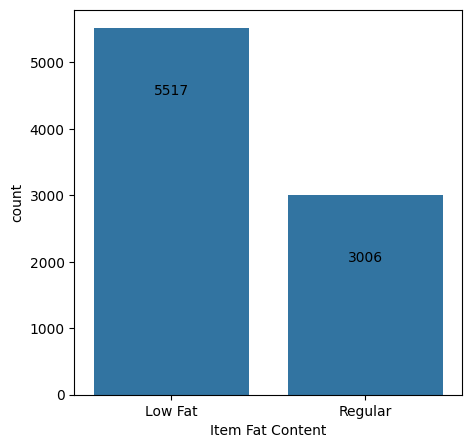

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Item Fat Content'])
ax = plt.gca()
for bar in ax.patches:
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    plt.text(x_pos, height - 1000, str(int(height)), ha='center')
plt.show()


In [81]:
grouped_data=df.groupby('Item Fat Content')['Sales'].sum()
grouped_data

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales by Fat Content')

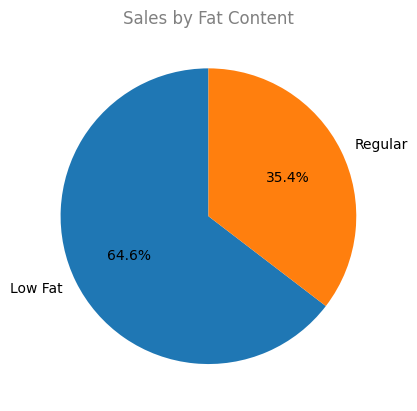

In [86]:
plt.pie(grouped_data,
        labels=grouped_data.index,
       autopct='%.1f%%',
       startangle=90)
plt.title("Sales by Fat Content", color='gray')

#### Total Sales by Item Type:
	Objective: Identify the performance of different item types in terms of total sales.
	Additional KPI Metrics: Assess how other KPIs (Average Sales, Number of Items, Average Rating) vary with fat content.
	Chart Type: Bar Chart

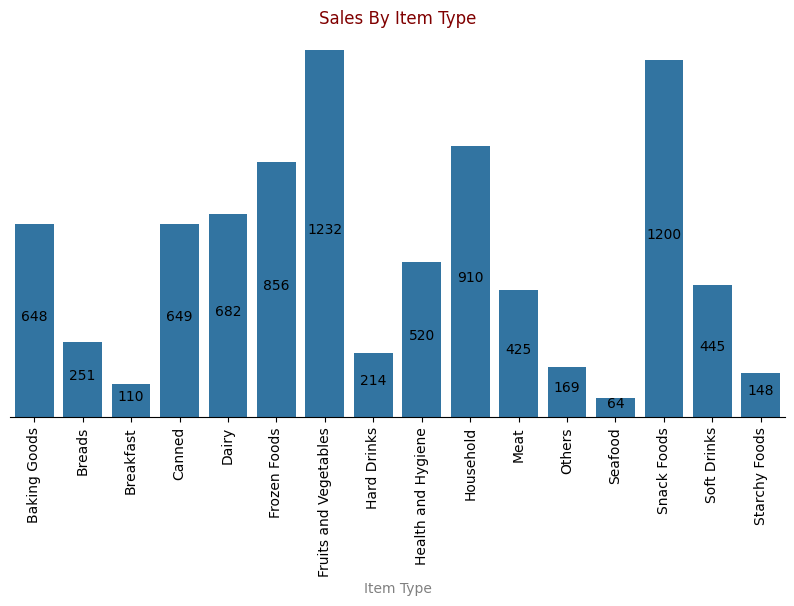

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Item Type'])
plt.xticks(rotation=90)
plt.yticks([])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Item Type",color='gray')
ax.set_ylabel('')
for bar in ax.patches:
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    plt.text(x_pos, height/2, str(int(height)), ha='center')
plt.title("Sales By Item Type",color='maroon')
plt.show()

#### Fat Content by Outlet for Total Sales:
	Objective: Compare total sales across different outlets segmented by fat content.
	Additional KPI Metrics: Assess how other KPIs (Average Sales, Number of Items, Average Rating) vary with fat content.
	Chart Type: Stacked Column Chart.

In [102]:
df.shape

(8523, 12)

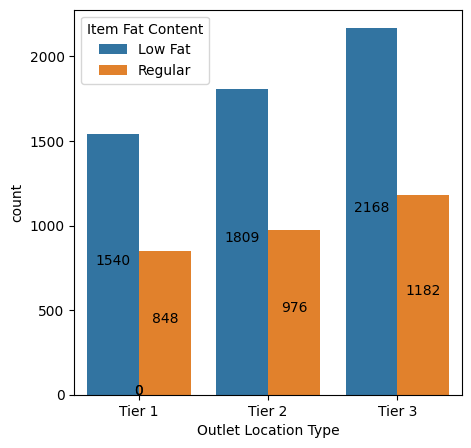

In [105]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='Outlet Location Type',hue='Item Fat Content')
ax = plt.gca()
for bar in ax.patches:
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    plt.text(x_pos, height/2, str(int(height)), ha='center')
plt.show()


#### Total Sales by Outlet Establishment:
	Objective: Evaluate how the age or type of outlet establishment influences total sales.
	Chart Type: Line Chart

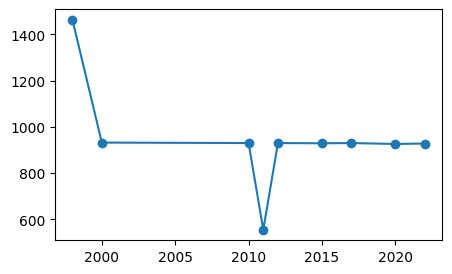

In [110]:
groupby_outlet=df.groupby('Outlet Establishment Year')['Sales'].count()
plt.figure(figsize=(5,3))
plt.plot(groupby_outlet.index,groupby_outlet.values,marker='o')

#### Sales by Outlet Size:
	Objective: Analyze the correlation between outlet size and total sales.
	Chart Type: Donut/ Pie Chart.

Text(0.5, 1.0, 'Sales by Outlet size')

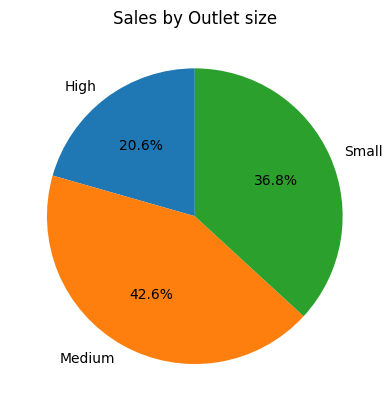

In [113]:
groupby_osize=df.groupby('Outlet Size')['Sales'].count()
plt.pie(groupby_osize,
       labels=groupby_osize.index,
       autopct='%.1f%%',
       startangle=90)
plt.title('Sales by Outlet size')

#### Sales by Outlet Location:
	Objective: Assess the geographic distribution of sales across different locations.
	Chart Type: Funnel Map.


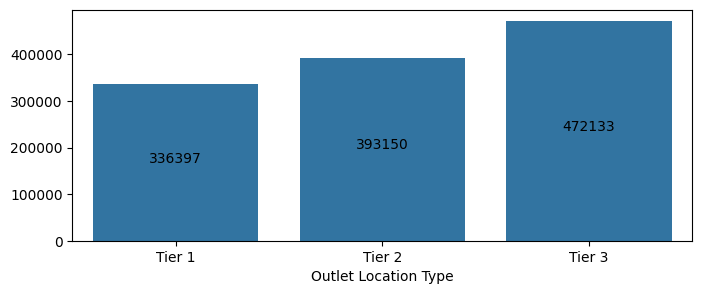

In [129]:
groupby_olocation=df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=True)
plt.figure(figsize=(8,3))
sns.barplot(x=groupby_olocation.index,y=groupby_olocation.values)
ax=plt.gca()
for bar in ax.patches:
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    plt.text(x_pos, height/2, str(int(height)), ha='center')
    